Bibliotheken importieren

In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Daten einlesen

In [134]:
data = pd.read_csv('../0_DataPreparation/merged_data_full_with_weekdays.csv')
#print(data.head())

Typen der Daten bestimmen

In [135]:
for col in data.columns:
    print(f"Spalte: {col}, Datentyp: {data[col].dtype}")

Spalte: Datum, Datentyp: object
Spalte: Warengruppe, Datentyp: int64
Spalte: Umsatz, Datentyp: float64
Spalte: KielerWoche, Datentyp: float64
Spalte: Bewoelkung, Datentyp: float64
Spalte: Temperatur, Datentyp: float64
Spalte: Windgeschwindigkeit, Datentyp: float64
Spalte: Wettercode, Datentyp: float64
Spalte: Feiertag, Datentyp: float64
Spalte: Montag, Datentyp: int64
Spalte: Dienstag, Datentyp: int64
Spalte: Mittwoch, Datentyp: int64
Spalte: Donnerstag, Datentyp: int64
Spalte: Freitag, Datentyp: int64
Spalte: Samstag, Datentyp: int64
Spalte: Sonntag, Datentyp: int64


Daten vorbereiten

In [136]:
# Datum konvertieren
data['Datum'] = pd.to_datetime(data['Datum'])

# Kodieren von Warengruppe und Wettercode (One-Hot-Encoding)
data = pd.get_dummies(data, columns=['Warengruppe', 'Wettercode'], drop_first=True)

# Prüfen auf fehlende Werte
data.fillna(method='ffill', inplace=True)  # Beispiel: Fehlende Werte auffüllen

print(data.head())

       Datum      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0 2013-07-01  148.828353          0.0         6.0     17.8375   
1 2013-07-02  159.793757          0.0         3.0     17.3125   
2 2013-07-03  111.885594          0.0         7.0     21.0750   
3 2013-07-04  168.864941          0.0         7.0     18.8500   
4 2013-07-05  171.280754          0.0         5.0     19.9750   

   Windgeschwindigkeit  Feiertag  Montag  Dienstag  Mittwoch  ...  \
0                 15.0       0.0       1         0         0  ...   
1                 10.0       0.0       0         1         0  ...   
2                  6.0       0.0       0         0         1  ...   
3                  7.0       0.0       0         0         0  ...   
4                 12.0       0.0       0         0         0  ...   

   Wettercode_63.0  Wettercode_65.0  Wettercode_68.0  Wettercode_69.0  \
0            False            False            False            False   
1            False            False            F

/tmp/ipykernel_70002/3991669894.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Beispiel: Fehlende Werte auffüllen


Umsatz durchschnitt bestimmen

In [ ]:
umsatz_mean = data['Umsatz'].mean()
print(umsatz_mean)

206.74904447892774


Umsatzausreißer korrigieren:

In [138]:
tage_neu_setzen = ['2014-05-05',
    '2013-12-31', '2014-12-31', '2015-12-31', 
    '2016-12-31', '2017-12-31'
]
data.loc[data['Datum'].isin(pd.to_datetime(tage_neu_setzen)), 'Umsatz'] = umsatz_mean


Umsatz erneut auf ausreißer prüfen

In [139]:
# Filtern der Tage mit Umsatz > 1000
umsatz_filter = data[data['Umsatz'] > 1000]

# Ausgabe der gefilterten Daten
print(umsatz_filter[['Datum', 'Umsatz']])

Empty DataFrame
Columns: [Datum, Umsatz]
Index: []


Features und Ziel definieren

In [140]:
# Zielvariable
y = data['Umsatz']

# Features
X = data.drop(columns=['Umsatz', 'Datum'])  # Datum kann als numerischer Faktor weggelassen werden

Daten aufteilen

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modell trainieren

In [142]:
# Modell initialisieren und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Vorhersagen treffen und Evaluierung

In [143]:
# Vorhersagen
y_pred = model.predict(X_test)

# Bewertung
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4372.441534137368


R^2 & Adjustierten R^2

In [144]:
from sklearn.metrics import mean_squared_error, r2_score

# R^2 berechnen
r2 = r2_score(y_test, y_pred)

# Anzahl der Beobachtungen (n) und Features (p)
n = X_test.shape[0]
p = X_test.shape[1]

# Adjustierten R^2 berechnen
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R^2: {r2:.4f}")
print(f"Adjustiertes R^2: {adjusted_r2:.4f}")

R^2: 0.7494
Adjustiertes R^2: 0.7441


Interpretation der Ergebnisse

In [145]:
# Koeffizienten anzeigen
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
#print(coefficients)

Streudiagramm

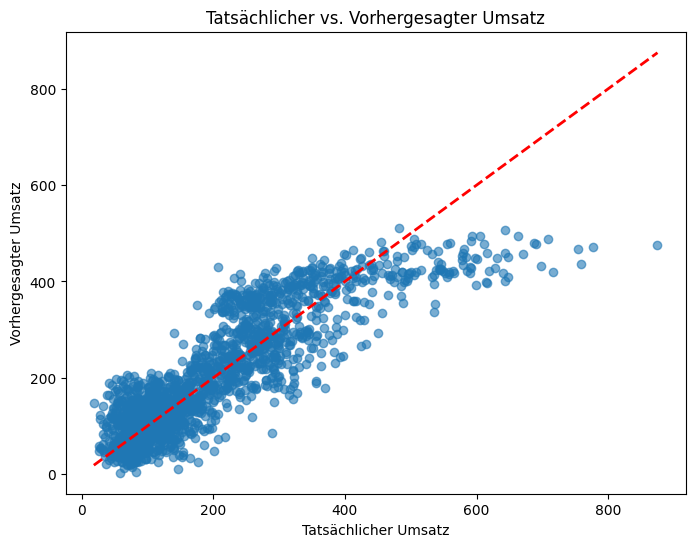

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tatsächlicher Umsatz')
plt.ylabel('Vorhergesagter Umsatz')
plt.title('Tatsächlicher vs. Vorhergesagter Umsatz')
plt.show()

Ausreißer identifizieren

In [147]:
# Filtern der Tage mit Umsatz > 1000
umsatz_filter = data[data['Umsatz'] > 500]

# Ausgabe der gefilterten Daten
print(umsatz_filter[['Datum', 'Umsatz']])

          Datum      Umsatz
1819 2013-07-01  535.856285
1820 2013-07-02  546.780787
1824 2013-07-06  631.906068
1825 2013-07-07  695.255730
1826 2013-07-08  538.529250
...         ...         ...
7264 2013-08-11  583.491718
7270 2013-08-17  519.834929
7277 2013-08-24  536.196772
7627 2014-08-18  556.679927
9003 2018-06-23  662.369321

[432 rows x 2 columns]


Ausreißer analysieren: 

In [148]:
# Konvertiere 'Datum' in ein datetime-Format
data['Datum'] = pd.to_datetime(data['Datum'])

# Extrahiere den Wochentag
data['Wochentag'] = data['Datum'].dt.day_name()

# Filtere die Daten (Umsatz > 500)
umsatz_filter = data[data['Umsatz'] > 500]

# Gruppiere nach Wochentag und zähle die Einträge
wochentag_counts = umsatz_filter['Wochentag'].value_counts()

# Sortiere die Wochentage in der natürlichen Reihenfolge
wochentag_counts = wochentag_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Ausgabe der Zählwerte
print(wochentag_counts)

Wochentag
Monday        40
Tuesday       31
Wednesday     32
Thursday      36
Friday        44
Saturday     104
Sunday       145
Name: count, dtype: int64


Diagramm zu ausreißern erstellen: 

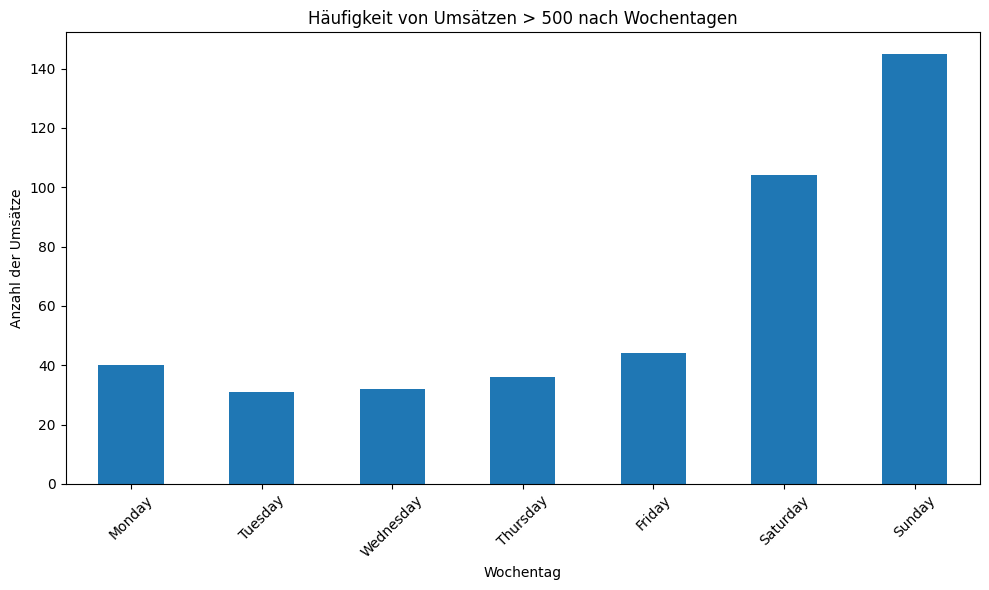

In [149]:
# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
wochentag_counts.plot(kind='bar')

# Diagrammbeschriftungen hinzufügen
plt.title('Häufigkeit von Umsätzen > 500 nach Wochentagen')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Umsätze')
plt.xticks(rotation=45)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

Fehler hervorheben

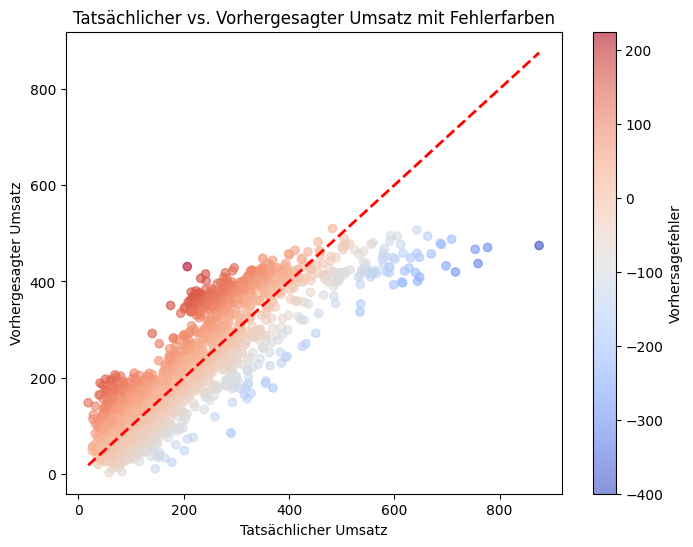

In [150]:
errors = y_pred - y_test

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm', alpha=0.6)  # Farbskala für Fehler
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.colorbar(label='Vorhersagefehler')
plt.xlabel('Tatsächlicher Umsatz')
plt.ylabel('Vorhergesagter Umsatz')
plt.title('Tatsächlicher vs. Vorhergesagter Umsatz mit Fehlerfarben')
plt.show()

Residualanalyse (Fehleranalyse)

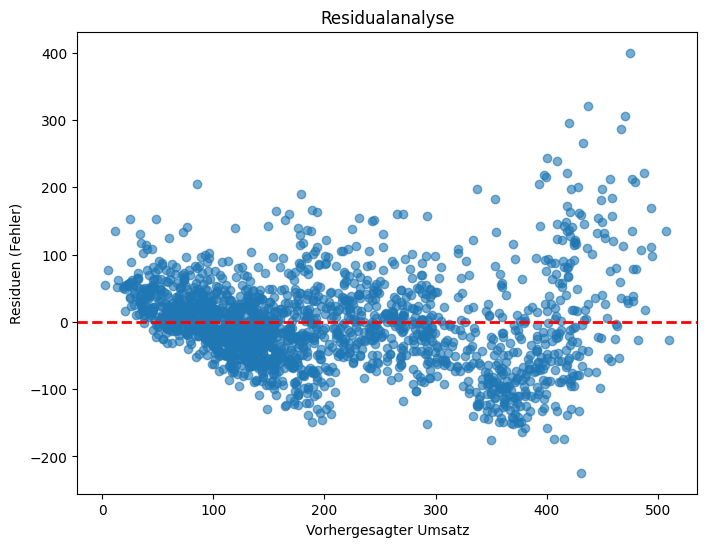

In [151]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Vorhergesagter Umsatz')
plt.ylabel('Residuen (Fehler)')
plt.title('Residualanalyse')
plt.show()

Feature-Wichtigkeit für erklärende Variablen

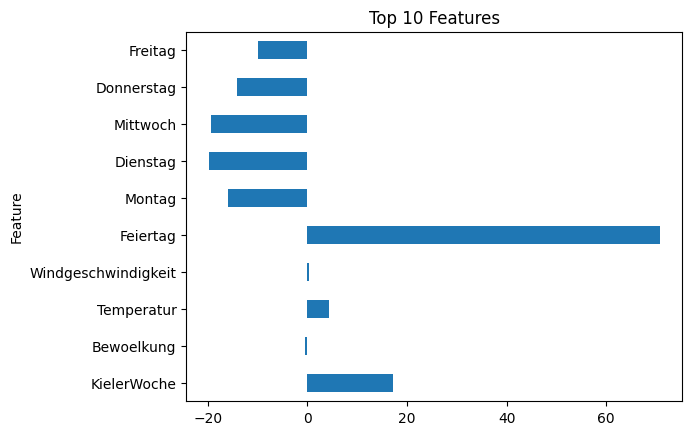

In [152]:
coefficients.head(10).plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title('Top 10 Features')
plt.show()